<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 5: Proceso de Selección de Métodos</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 5.6: Árboles de Decisión (Decision Tree)</center></font>
</div>

## ÁRBOLES DE DECISIÓN (DECISION TREE, DT)

### ¿Qué es un árbol de decisión?
Los arboles de decisión son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en **Aprendizaje Máquina (Machine Learning)** y pueden realizar tareas de clasificación o regresión (***Classification And Regression Tree, CART***). La comprensión de su funcionamiento suele ser simple y a la vez muy certera.

Utilizamos mentalmente estructuras de árbol de decisión constantemente en nuestra vida diaria sin darnos cuenta por medio de decisiones del tipo *If This Then That*:

* ¿Llueve? → Usar un paraguas. 
* ¿Soleado? → Usar gafas de sol. 
* ¿Cansado? → Tomar una siesta.

Los árboles de decisión tienen un primer nodo llamado raíz (*root*) y luego se descomponen el resto de atributos de entrada en dos ramas (aunque pueden ser más) planteando una condición que puede ser cierta o falsa. Se bifurca cada nodo en 2 y vuelven a subdividirse hasta llegar a las hojas que son los nodos finales y que equivalen a respuestas a la solución: *Si/No*, *Comprar/Vender*, o dependiendo de lo que se esté clasificando.

### ¿Qué necesidad hay de usar este modelo?
Si suponemos que se cuenta con atributos como género con valores [*hombre, mujer*] y edad en rangos [*menor de 18, mayor de 18*] para tomar una decisión, se puede crear un árbol en el que se divide primero por género y luego se puede subdividir por edad, aunque es posible realizar al revés, primero por edad y luego por género. 

Analizando los datos y las salidas, el algoritmo decidirá la mejor forma de hacer las divisiones (*split*) entre los nodos, por ello es un ***modelo supervisado***. Tendrá en cuenta la manera de lograr una predicción (clasificación ó regresión) con mayor probabilidad de acierto. 

Si se tienen 10 atributos de entrada, cada uno con 2 o más valores posibles, las combinaciones para decidir el mejor árbol serían cientos ó miles. Debido a ello el algoritmo cobra importancia, pues devolverá el árbol óptimo para la toma de decisión más acertada desde un punto de vista probabilístico.

### ¿Cómo funciona un árbol de decisión?
Para obtener el árbol óptimo y valorar cada subdivisión entre todos los árboles posibles y conseguir el nodo raiz y los subsiguientes, el algoritmo deberá medir de alguna manera las predicciones logradas y valorarlas para comparar de entre todas y obtener la mejor. 

Para medir y valorar utiliza diversas funciones, siendo las más conocidas el ***Indice GINI*** y la ***Ganancia de Información***, la cual utiliza la denominada ***Entropía***. La división de nodos continuará hasta que se llegue a la profundidad máxima posible del árbol ó se limiten los nodos a una cantidad mínima de muestras en cada hoja. 

* **Indice GINI**: Se utiliza para atributos con valores continuos (por ejemplo, el costo de una casa). Esta función de costo mide el *grado de impureza* de los nodos, es decir, cuán desordenados o mezclados quedan los nodos una vez divididos. Es necesario minimizar el valor del **Indice GINI**.

* **Ganancia de Información**: Se utiliza para atributos categóricos (por ejemplo, hombre o mujer). Este criterio intenta estimar la información que aporta cada atributo basado en la *teoría de la información*. Para medir la aleatoriedad de incertidumbre de un valor aleatorio de una variable *X* se define la **Entropía**. Al obtener la medida de **Entropía** de cada atributo, se puede calcular la ganancia de información del árbol. Es necesario maximizar el valor de la **Ganancia de Información**.

***Nota:*** La **Entropía** es la magnitud física que mide la parte de la energía que no puede utilizarse para realizar trabajo, desde el punto de vista estadístico es la medida de la incertidumbre existente.

### Implementación de un ejemplo
Para este ejemplo se tomarán 600 registros para realizar la determinación a través del modelo de **Árbol de Decisión** del artista del *Billboard 100* que llegará al número 1 en un ranking. Esto es, a partir de atributos de cantantes y de un histórico de canciones que alcanzaron entrar al *Billboard 100* de los Estados Unidos de América entre el 2004 y el 2015, se creará un árbol que permita intentar predecir si un nuevo cantante podrá llegar a número uno. Para ello se emplearán las librerías que ya son conocidas, como **Pandas**, **NumPy**, **Matplotlib**, **Seaborn** y **SciKit-Learn**.
<br>
<img src="./Imagenes/Logos.png" style="width:400px;height:145px;" class="center">
<br>

Los datos de entrada que se usarán están contenidos en el archivo `Billboard.csv`, el cual contiene los siguientes encabezados de las columnas de información:

1. `ID`: Es el identificador de cada entrada.
2. `Title`: Es el título de la canción.
3. `Artist`: Es el nombre del artista.
4. `Mood`: Es el estado de ánimo de la canción.
5. `Tempo`: Es el tipo de tempo o velocidad a la que se reproduce la canción.
6. `Genre`: Es el género de la canción.
7. `Artist_Type`: Es el tipo de artista que consiste de los campos:
    * `Male`: Hombre.
    * `Female`: Mujer.
    * `Mixed`: Combinado.
8. `Chart_Date`: Es la fecha en la que apareció en el Billboard.
9. `Duration`: Es la duración de la canción en segundos.
10. `Top`: Es la columna que servirá como etiqueta. Consiste de los campos:
    * `0`: No llegó a número 1 en el Billboard. 
    * `1`: Si llegó a número 1 en el Billboard
11. `Birthyear`: Es el año de nacimiento del artista principal.
   
**El problema consiste en predecir si un nuevo cantante podrá llegar a número uno en el Billboard empleando esta información para entrenar el algoritmo.**

Para ello, primeramente se importarán las librerías **Pandas**, **NumPy**, **Matplotlib**, **Seaborn** y **Scikit-Learn**:

In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (16, 9)}) 
plt.style.use('ggplot')

Ahora se realiza la lectura del DataSet desde un archivo `CSV` y se guarda en un **DataFrame** de **Pandas**:

In [2]:
#Lectura del DataSet
datos_df = pd.read_csv("./Datos/Billboard.csv")

#Impresión de los Resultados
print("La cantidad de registros en el DataFrame (renglones) es:", datos_df.shape[0])
print("El DataFrame es:")
datos_df.head(10)

La cantidad de registros en el DataFrame (renglones) es: 600
El DataFrame es:


,ID,Title,Artist,Mood,Tempo,Genre,Artist_Type,Chart_Date,Duration,Top,Birthyear
0,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
1,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
2,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
3,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0
4,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,219.0,0,1990.0
5,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,43.0,1,1981.0
6,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,557.0,0,1973.0
7,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,20140329,182.0,0,1969.0
8,9,Chocolate,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,20140208,347.0,0,0.0
9,10,Fancy,IGGY AZALEA featuring CHARLI XCX,Energizing,Medium Tempo,Urban,Female,20140607,197.0,1,1974.0


Se puede verificar la cantidad de registros que alcanzaron llegar al número 1 en el **DataFrame** y las que no, revisando la columna `top`: 

In [3]:
#Mostrar las cantidades de canciones en el número 1 contenidas en la columna "top"
print("La cantidad de canciones que NO llegaron a número 1 es:", datos_df.groupby('Top').size()[0])
print("La cantidad de canciones que SI llegaron a número 1 es:", datos_df.groupby('Top').size()[1])

La cantidad de canciones que NO llegaron a número 1 es: 470
La cantidad de canciones que SI llegaron a número 1 es: 130


Es decir, se tienen 470 canciones que no alcanzaron la cima, y a 130 que alcanzaron el número uno. 

En otras palabras, se tiene una cantidad ***desbalanceada*** de etiquetas con valores `0` y `1` en la columna `Top`. Se puede visualizar esta diferencia por medio del método `.catplot()` de la librería **Seaborn**. 

La descripción detallada del método `.catplot()` se puede consultar [en esta liga](https://seaborn.pydata.org/generated/seaborn.catplot.html).

La paleta de colores empleada en el método `.catplot()` y definida por el parámetro `palette` puede ser consultada a través [de esta liga](https://seaborn.pydata.org/tutorial/color_palettes.html).

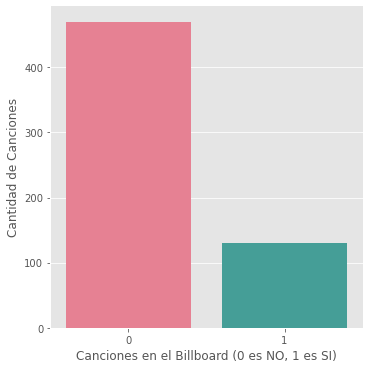

In [4]:
#Deshabilitar los Warnings
import warnings
warnings.filterwarnings("ignore")

#Mostrar los valores en la columna "Top"
sb.catplot('Top', data = datos_df, kind = 'count', palette = 'husl');
plt.xlabel("Canciones en el Billboard (0 es NO, 1 es SI)");
plt.ylabel("Cantidad de Canciones");

Continuando con la visualización de los datos empleando el método `.catplot()`, se muestran los valores contenidos en la columna `Artist_Type` la cual tiene tres valores posibles (`male`, `female` y `mixed`):

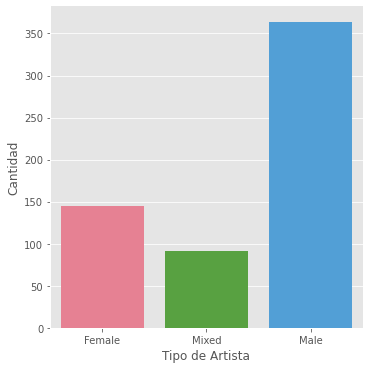

In [5]:
#Mostrar los valores en la columna "Artist_Type"
sb.catplot('Artist_Type', data = datos_df, kind = 'count', palette = 'husl');
plt.xlabel("Tipo de Artista");
plt.ylabel("Cantidad");

Se puede hacer una combinación de los resultados, para mostrar la cantidad de canciones que llegaron o no al número 1 en el **Billboard** pero clasificadas por el tipo de artista, es decir, combinar las columnas `Top` y `Artist_Type`. Para ello se usa el parámetro `hue` en el método `.catplot()` de la siguiente manera:

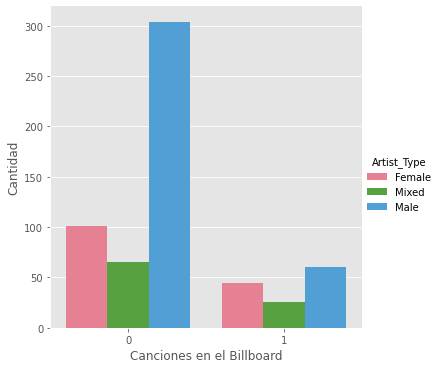

In [6]:
#Mostrar los valores combinados en las columnas "top" y "artist_type"
sb.catplot('Top', data = datos_df, hue = 'Artist_Type', kind = 'count', palette = 'husl');
plt.xlabel("Canciones en el Billboard");
plt.ylabel("Cantidad");

Ahora se revisará el contenido de la columna `Mood`, la cual muestra el estado de ánimo que produce cada canción, para con ello poder identificar los diversos tipos y cuáles de ellos son más sobresalientes:

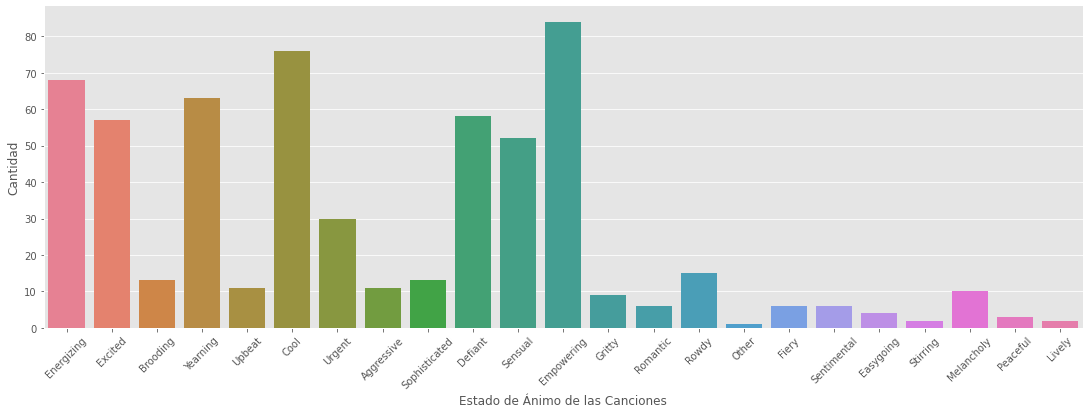

In [7]:
#Mostrar los valores de la columna "Mood" en el DataFrame
sb.catplot('Mood', data = datos_df, kind = 'count', aspect = 3, palette = 'husl');
plt.xlabel("Estado de Ánimo de las Canciones");
plt.ylabel("Cantidad");
plt.xticks(rotation=45);

Ahora se combinarán los datos de las columnas `Tempo` y `Top` para identificar el *tempo* que tienen las canciones que alcanzaron o no a llegar al número 1 en el **Billboard**. La  columna `Tempo` contiene los valores `Medium Tempo`, `Slow Tempo` y `Fast Tempo` que hace referencia a su velocidad de reproducción:

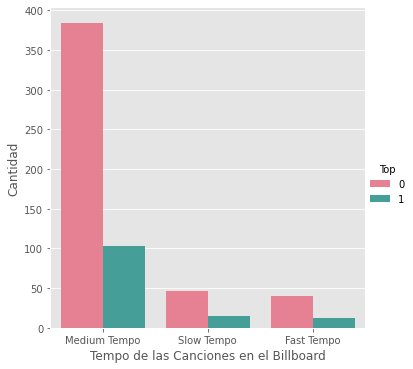

In [8]:
#Mostrar los valores combinados en las columnas "Tempo" y "Top"
sb.catplot('Tempo', data = datos_df, hue = 'Top', kind = 'count', palette = 'husl');
plt.xlabel("Tempo de las Canciones en el Billboard");
plt.ylabel("Cantidad");

Se revisará el contenido de la columna `Genre`, la cual muestra el género al que pertenece cada canción, para con ello poder identificar los diversos tipos y cuáles de ellos son más sobresalientes:

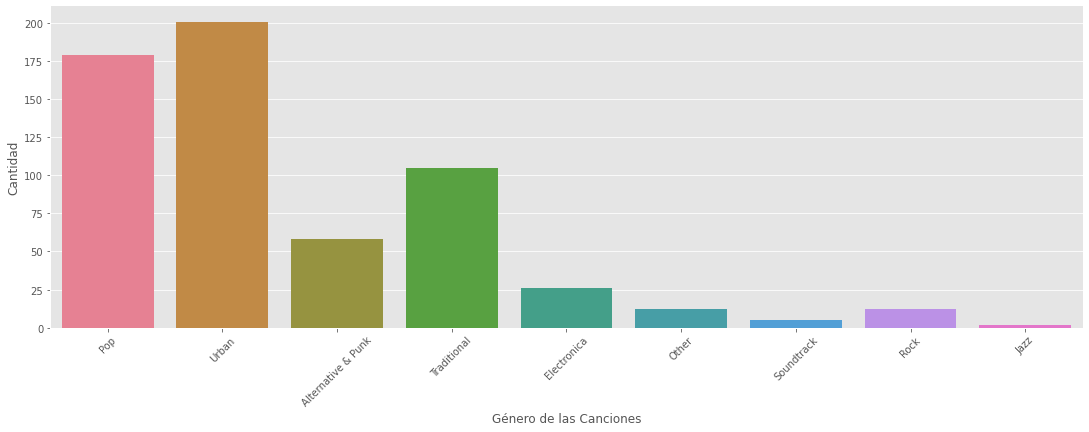

In [9]:
#Mostrar los valores de la columna "Genre" en el DataFrame
sb.catplot('Genre', data = datos_df, kind = 'count', aspect = 3, palette = 'husl');
plt.xlabel("Género de las Canciones");
plt.ylabel("Cantidad");
plt.xticks(rotation=45);

Se combinarán los datos de las columnas `Mood` y `Top` para identificar el estado de ánimo que producen las canciones que alcanzaron o no a llegar al número 1 en el **Billboard**:

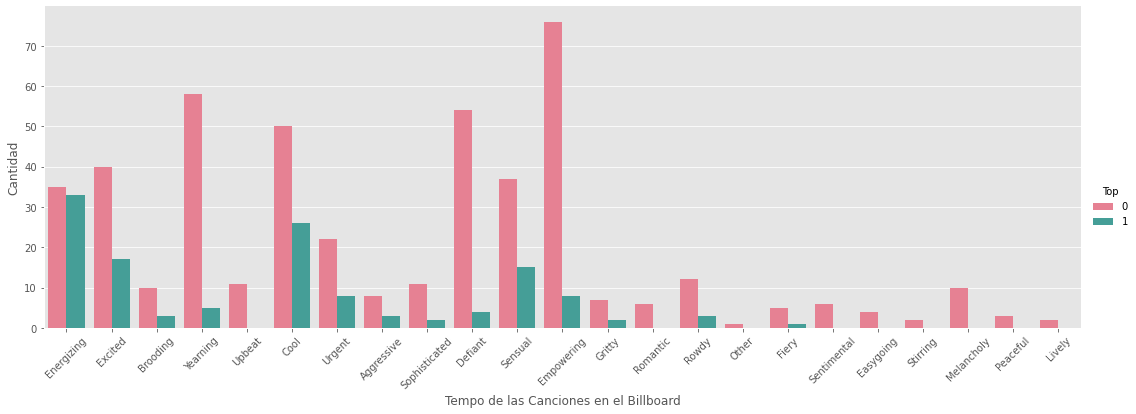

In [10]:
#Mostrar los valores combinados en las columnas "mood" y "top"
sb.catplot('Mood', data = datos_df, hue = 'Top', kind = 'count', aspect = 3, palette = 'husl');
plt.xlabel("Tempo de las Canciones en el Billboard");
plt.ylabel("Cantidad");
plt.xticks(rotation=45);

Se revisará el contenido de la columna `Birthyear`, la cual muestra los años de nacimiento de los artistas principales de cada canción, para con ello poder identificar los rangos de tiempo y cuáles de ellos son más sobresalientes:

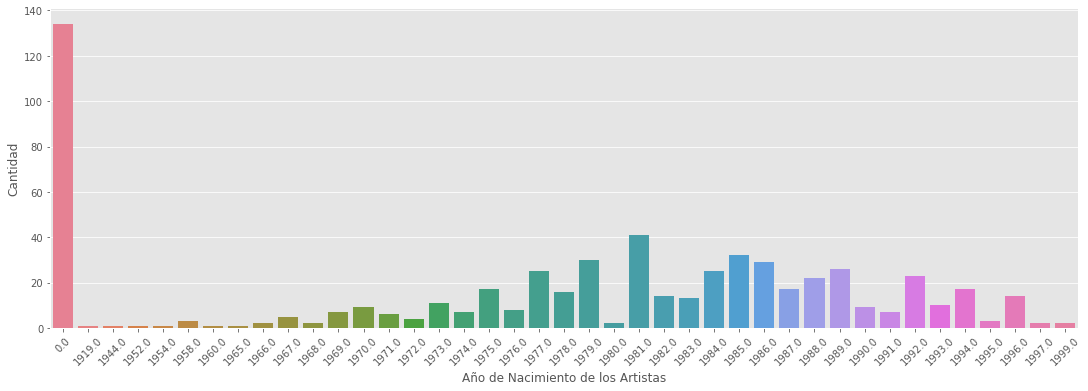

In [11]:
#Mostrar los valores de la columna "Birthyear" en el DataFrame
sb.catplot('Birthyear', data = datos_df, kind = 'count', aspect = 3, palette = 'husl');
plt.xlabel("Año de Nacimiento de los Artistas");
plt.ylabel("Cantidad");
plt.xticks(rotation=45);

Es poisible notar que se tienen más de 120 registros de canciones de las que se desconoce el año de nacimiento del artista. Esto se puede determinar de la siguente manera:

In [12]:
#Determinación de los registros sin año de nacimiento
year_birth = datos_df['Birthyear']
year_0 = len(year_birth[year_birth <= 0])
print("La cantidad de registros que no tienen un año de nacimiento es:", year_0)

La cantidad de registros que no tienen un año de nacimiento es: 134


### Balanceo de Datos: Pocos artistas llegan al número uno
Como se pudo ver con anterioridad, no existe un *equilibrio* en la cantidad de etiquetas top y no-top de las canciones. Esto se debe a que en el transcurso de un año, apenas unas 5 o 6 canciones logran el primer puesto y se mantienen durante varias semanas en ese puesto.

Para equilibrar los casos positivos, el **DataFrame** contiene sólamente las canciones que llegaron al número 1 entre los años 2004 al 2013, y para los años 2014 y 2015 contiene la lista completa. A pesar de ello sigue desbalanceado, una alternativa sería continuar agregando canciones en el número 1 en años previos a 2004, la otra opción es emplear un parámetro del algoritmo de **Árbol de Decisión** (class_weight) para compensar esta diferencia.

Primeramente, se visualizarán las canciones que llegaron o no al número 1 en el **Billboard** de acuerdo a sus fechas que tienen registradas en el **DataFrame**. Este gráfico que se realiza a través del método `.scatter()` de la librería **Matplotlib**.

El color `azul` indica canciones que llegaron al número 1, y el color `naranja` indica canciones que no llegaron. Por lo mismo, será posible observar que en los años del 2004 al 2013 solo aparecen canciones en el número 1, a diferencia del 2014 y 2015:

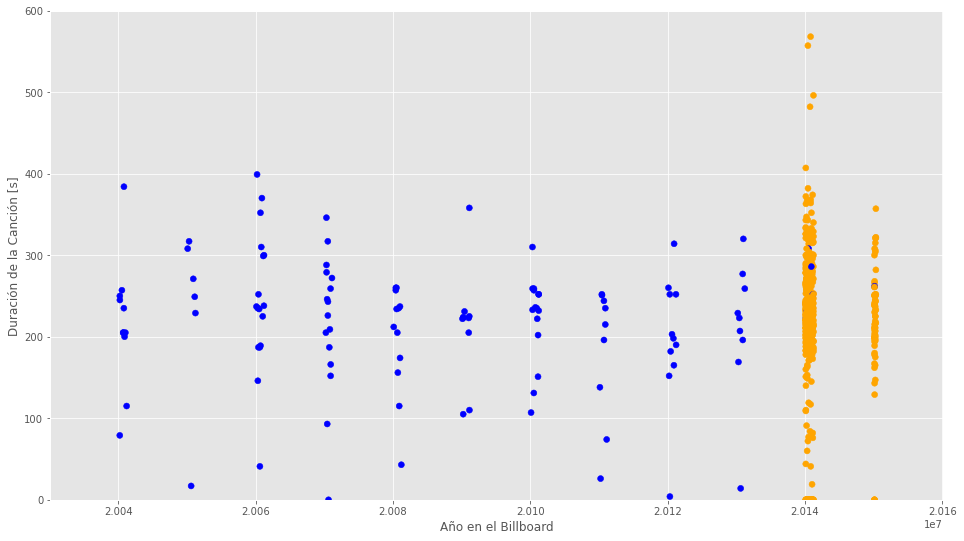

In [13]:
#Mostrar la relación de los valores en las columnas "Chart_Date" y "Duration"
f1 = datos_df['Chart_Date'].values
f2 = datos_df['Duration'].values

color = ['orange','blue'] 

asignar = []
for index, row in datos_df.iterrows():    
    asignar.append(color[row['Top']])

plt.scatter(f1, f2, c = asignar);
plt.xlabel("Año en el Billboard");
plt.ylabel("Duración de la Canción [s]");
plt.axis([20030101,20160101,0,600]);
plt.show();

### Preparación de los Datos
Primeramente, se procederá a ajustar el problema de los años de nacimiento que están en cero. 

La característica (*feature*) que se pretende obtener es: ***conociendo el año de nacimiento del cantante, calcular la edad que tenía al momento de aparecer en el Billboard***. Por ejemplo un artista que nació en 1982 y apareció en los charts en 2012, tenía 30 años.

Para ello, se van a sustituir los ceros de la columna `Birthyear` por el valor `None`, el cual representa nulidad en **Python** (es igual a `NaN`) de la siguiente manera:

In [14]:
#Definición de una Función para Asignar Valores "None" a la columna "Birthyear"
def edad_fix(year):
    if year == 0:
        return None
    return year

#Llamado a la Función
datos_df['Birthyear'] = datos_df.apply(lambda x: edad_fix(x['Birthyear']), axis=1)

#Impresión de los Resultados
print("El DataFrame es:")
datos_df.head(10)

El DataFrame es:


,ID,Title,Artist,Mood,Tempo,Genre,Artist_Type,Chart_Date,Duration,Top,Birthyear
0,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
1,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
2,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
3,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN
4,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,219.0,0,1990.0
5,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,43.0,1,1981.0
6,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,557.0,0,1973.0
7,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,20140329,182.0,0,1969.0
8,9,Chocolate,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,20140208,347.0,0,NaN
9,10,Fancy,IGGY AZALEA featuring CHARLI XCX,Energizing,Medium Tempo,Urban,Female,20140607,197.0,1,1974.0


Ahora se calcularán las edades en una nueva columna llamada `Age`, restando el año de aparición al año de nacimiento. El año de aparición corresponde a los 4 primeros caracteres de la columna `Chart_Date`. En las filas donde el año de nacimiento tenga un valor `None`, se tendrá como resultado un `None` también:

In [15]:
#Definición de una Función para Agregar la columna "Age" al DataFrame
def calcula_edad(anio, cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio == 0.0:
        return None
    return int(momento) - anio

#Llamado a la Función
datos_df['Age'] = datos_df.apply(lambda x: calcula_edad(x['Birthyear'], x['Chart_Date']), axis=1);

#Impresión de los Resultados
print("El DataFrame es:")
datos_df.head(10)

El DataFrame es:


,ID,Title,Artist,Mood,Tempo,Genre,Artist_Type,Chart_Date,Duration,Top,Birthyear,Age
0,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25.0
1,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21.0
2,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25.0
3,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,NaN
4,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,219.0,0,1990.0,24.0
5,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,43.0,1,1981.0,27.0
6,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,557.0,0,1973.0,41.0
7,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,20140329,182.0,0,1969.0,45.0
8,9,Chocolate,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,20140208,347.0,0,NaN,NaN
9,10,Fancy,IGGY AZALEA featuring CHARLI XCX,Energizing,Medium Tempo,Urban,Female,20140607,197.0,1,1974.0,40.0


Ahora, se asignarán edades aleatorias a los registros faltantes. Para ello se realizarán las siguientes operaciones:

1. Obtener el promedio de edad de la columna `Age` con el método `mean()`.
2. Obtener la desviación estándar de la columna `Age` con el método `std()`.
3. Se determina la cantidad de valores nulos en la columna `Age` con el método `.isnull().sum()`.
4. Se calculan valores aleatorios que van desde (mean – std) hasta (mean + std) usando la función `np.random.randint()` de **NumPy**, en este caso serán edades en el rango de 21 a 37 años. 

Esto es:

In [16]:
#Determinación del Promedio de Edad
age_avg = datos_df['Age'].mean()

#Determinación de la Desviación Estándar de la Edad
age_std = datos_df['Age'].std()

#Determinación de la Cantidad de Valores Nulos
age_null_count = datos_df['Age'].isnull().sum()

#Determinación de Valores Aleatorios
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)

#Asignación de los Valores Aleatorios en los Valores Nulos
datos_df.loc[np.isnan(datos_df['Age']), 'Age'] = age_null_random_list

#Asignación del Formato Entero a la Columna "Age"
datos_df['Age'] = datos_df['Age'].astype(int)

#Impresión de los Resultados
print("Edad Promedio: %.2f"% age_avg, "años")
print("Desviación Estándar de la Edad: %.2f"%age_std, "años")
print("Intérvalo para asignar la edad aleatoria: %i"% int(age_avg - age_std) + " a %i"% + int(age_avg + age_std), "años")
print("El DataFrame es:")
datos_df.head(10)

Edad Promedio: 30.06 años
Desviación Estándar de la Edad: 8.55 años
Intérvalo para asignar la edad aleatoria: 21 a 38 años
El DataFrame es:


,ID,Title,Artist,Mood,Tempo,Genre,Artist_Type,Chart_Date,Duration,Top,Birthyear,Age
0,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25
1,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21
2,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25
3,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,31
4,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,219.0,0,1990.0,24
5,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,43.0,1,1981.0,27
6,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,557.0,0,1973.0,41
7,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,20140329,182.0,0,1969.0,45
8,9,Chocolate,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,20140208,347.0,0,NaN,33
9,10,Fancy,IGGY AZALEA featuring CHARLI XCX,Energizing,Medium Tempo,Urban,Female,20140607,197.0,1,1974.0,40


Lo más ideal es contar con la información real, la cual se podría obtener a través de una búsqueda en sitios especializados o en **Wikipedia**. Sin embargo, esta es una buena alternativa para llenar los campos guardando una correspondencia con los demás valores en el **DataFrame**.

### Mapeo de Datos
A continuación se van a transformar varios de los datos de entrada en valores categóricos:

* Estados de ánimo: Se agruparán por estados similares en valores de 0 a 6.
* Tempo: Se agruparán como: 0-Fast, 1-Slow, 2-Medium.
* Género: Se agruparán por géneros similares en valores del 0 al 4.
* Tipo de Artista: Se agruparán como: 1-Mixed, 2-Female, 3-Male.
* Edades: Se agruparán por grupos de edades en valores de 0 a 4. 
* Duración de las canciones: Se agruparán por tiempos de duración en valores de 0 a 6.

Esto se realiza de la siguiente manera:

In [17]:
#Mapeo del Estado de Ánimo (columna "Mood")
datos_df['MoodEncoded'] = datos_df['Mood'].map( {
                                        'Energizing': 6, 
                                        'Empowering': 6,
                                        'Cool': 5, 
                                        'Yearning': 4, 
                                        'Excited': 5, 
                                        'Defiant': 3, 
                                        'Sensual': 2, 
                                        'Gritty': 3,
                                        'Sophisticated': 4,
                                        'Aggressive': 4, 
                                        'Fiery': 4, 
                                        'Urgent': 3, 
                                        'Rowdy': 4, 
                                        'Sentimental': 4,
                                        'Easygoing': 1, 
                                        'Melancholy': 4, 
                                        'Romantic': 2, 
                                        'Peaceful': 1, 
                                        'Brooding': 4, 
                                        'Upbeat': 5, 
                                        'Stirring': 5, 
                                        'Lively': 5, 
                                        'Other': 0,
                                        '':0} 
                                            ).astype(int)

#Mapeo del Tempo (columna "Tempo")
datos_df['TempoEncoded'] = datos_df['Tempo'].map( {
                                        'Fast Tempo': 0, 
                                        'Medium Tempo': 2, 
                                        'Slow Tempo': 1, 
                                        '': 0} 
                                            ).astype(int)

#Mapeo del Género (columna "Genre")
datos_df['GenreEncoded'] = datos_df['Genre'].map( {
                                        'Urban': 4, 
                                        'Pop': 3, 
                                        'Traditional': 2, 
                                        'Alternative & Punk': 1,
                                        'Electronica': 1, 
                                        'Rock': 1, 
                                        'Soundtrack': 0, 
                                        'Jazz': 0,
                                        'Other':0,
                                        '':0} 
                                           ).astype(int)

#Mapeo del tipo de artista (columna "Artist_Type")
datos_df['Artist_TypeEncoded'] = datos_df['Artist_Type'].map( {
                                        'Female': 2, 
                                        'Male': 3, 
                                        'Mixed': 1, 
                                        '': 0} 
                                            ).astype(int)

#Mapeo de la edad en el Billboard (columna "Age")
datos_df.loc[ datos_df['Age'] <= 21, 'AgeEncoded'] = 0
datos_df.loc[(datos_df['Age'] >  21) & (datos_df['Age'] <= 26), 'AgeEncoded'] = 1
datos_df.loc[(datos_df['Age'] >  26) & (datos_df['Age'] <= 30), 'AgeEncoded'] = 2
datos_df.loc[(datos_df['Age'] >  30) & (datos_df['Age'] <= 40), 'AgeEncoded'] = 3
datos_df.loc[ datos_df['Age'] >  40, 'AgeEncoded'] = 4

#Mapeo de la duración de la canción (columna "DurationSeg") 
datos_df.loc[ datos_df['Duration'] <= 150, 'DurationEncoded'] = 0
datos_df.loc[(datos_df['Duration'] >  150) & (datos_df['Duration'] <= 180), 'DurationEncoded'] = 1
datos_df.loc[(datos_df['Duration'] >  180) & (datos_df['Duration'] <= 210), 'DurationEncoded'] = 2
datos_df.loc[(datos_df['Duration'] >  210) & (datos_df['Duration'] <= 240), 'DurationEncoded'] = 3
datos_df.loc[(datos_df['Duration'] >  240) & (datos_df['Duration'] <= 270), 'DurationEncoded'] = 4
datos_df.loc[(datos_df['Duration'] >  270) & (datos_df['Duration'] <= 300), 'DurationEncoded'] = 5
datos_df.loc[ datos_df['Duration'] >  300, 'DurationEncoded'] = 6

#Impresión de los Resultados
print("El DataFrame es:")
datos_df.head(10)

El DataFrame es:


,ID,Title,Artist,Mood,Tempo,Genre,Artist_Type,Chart_Date,Duration,Top,Birthyear,Age,MoodEncoded,TempoEncoded,GenreEncoded,Artist_TypeEncoded,AgeEncoded,DurationEncoded
0,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25,6,2,3,2,1.0,6.0
1,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21,5,2,4,1,0.0,3.0
2,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25,4,2,1,3,1.0,2.0
3,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,31,4,2,2,2,3.0,3.0
4,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,219.0,0,1990.0,24,5,2,2,3,1.0,3.0
5,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,43.0,1,1981.0,27,5,1,4,2,2.0,0.0
6,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,557.0,0,1973.0,41,3,0,3,3,4.0,6.0
7,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,20140329,182.0,0,1969.0,45,4,2,4,2,4.0,2.0
8,9,Chocolate,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,20140208,347.0,0,NaN,33,4,2,1,3,3.0,6.0
9,10,Fancy,IGGY AZALEA featuring CHARLI XCX,Energizing,Medium Tempo,Urban,Female,20140607,197.0,1,1974.0,40,6,2,4,2,3.0,2.0


Finalmente se obtiene un nuevo conjunto de datos llamado `datos_encoded` con el que se cuenta con los atributos definitivos para crear el árbol de decisión. 

Para ello, se eliminan las columnas que no se requieren (`Id`, `Title`, `Artist`, `Mood`, `Tempo`, `Genre`, `Artist_Type`, `Chart_Date`, `Birthyear`, `Duration` y `Age`) empleando el método `.drop()`:

In [18]:
#Eliminación de columnas no requeridas
drop_elements = ['ID','Title','Artist','Mood','Tempo','Genre','Artist_Type','Chart_Date','Birthyear','Duration','Age']
datos_encoded = datos_df.drop(drop_elements, axis = 1)

#Impresión de los Resultados
print("El DataFrame es:")
datos_encoded.head(10)

El DataFrame es:


,Top,MoodEncoded,TempoEncoded,GenreEncoded,Artist_TypeEncoded,AgeEncoded,DurationEncoded
0,0,6,2,3,2,1.0,6.0
1,1,5,2,4,1,0.0,3.0
2,0,4,2,1,3,1.0,2.0
3,0,4,2,2,2,3.0,3.0
4,0,5,2,2,3,1.0,3.0
5,1,5,1,4,2,2.0,0.0
6,0,3,0,3,3,4.0,6.0
7,0,4,2,4,2,4.0,2.0
8,0,4,2,1,3,3.0,6.0
9,1,6,2,4,2,3.0,2.0


Con este nuevo **DataFrame**, podemos realizar una matriz de correlación para visualizar las relaciones entre las variables empleando el método `heatmap()` de la librería **Seaborn**. 

La descripción detallada del método `heatmap()` se puede consultar [en esta liga](https://seaborn.pydata.org/generated/seaborn.heatmap.html). 

Debido a que los datos son categóricos, no hay una correlación marcada entre ellos, lo cual pudiera parecer que los datos no proporcionarán una adecuada predicción, pero el modelo del **Árbol de Decisión** será capaz de funcionar adecuadamente:

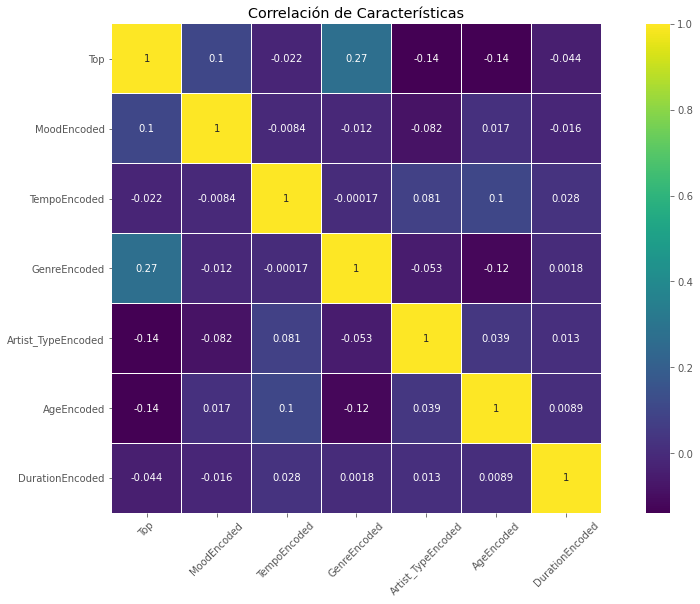

In [19]:
#Matriz de Correlación del DataFrame
plt.title('Correlación de Características');
plt.xticks(rotation = 45);
sb.heatmap(datos_encoded.astype(float).corr(),
           linewidths=0.1,
           vmax=1.0, 
           square=True, 
           cmap='viridis', 
           linecolor='white', 
           annot=True);

### Determinación de la Profundidad del Árbol de Decisión
Para poder crear el **Árbol de Decisión**, será necesario determinar la cantidad de niveles de profundidad que se le asignarán. 

Primeramente se empleará el método `.KFold()` de la librería **SciKit-Learn** el cual es de gran utilidad para crear varios subgrupos con los datos de entrada, y con ello validar y valorar los árboles con diversos niveles de profundidad. De entre ellos, se seleccionará el que proporcione un mejor resultado.

Posteriormente, para crear el árbol se utilizará el método `.tree.DecisionTreeClasifier()` de la librería **SciKit-Learn** pues se requiere un árbol de clasificación (no de regresión). Se configura con los parámetros:

* `criterion = entrop`: Es el criterio a emplear, en este caso se selecciona para la ganancia de información (entrophy) aunque pudiera ser **GINI**, pero se están usando entradas categóricas.
* `min_samples_split = 2`: Es la cantidad mínima de muestras que debe tener un nodo para poder subdividir.
* `min_samples_leaf = 5`: Es la cantidad mínima que puede tener una hoja final. Si tuviera menos, no se formaría adecuadamente esa hoja.
* `class_weight = {1:3.6}`: Este valor es de gran importancia, ya que es el empleado para compensar los desbalances que haya en los datos. Para este ejemplo, se tienen menos etiquetas de tipo `top=1` (los artistas que llegaron al número 1 del ranking). Por lo tanto, se le asigna un valor 3.6 de peso a la etiqueta 1 para compensar. El valor sale de dividir la cantidad de `top=0` (son 470) con los `top=1` (son 130).

**Nota**: Estos valores asignados a los parámetros se realizaron por prueba y error.

Para saber más:
* La descripción detallada del método `.KFold()` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

* La descripción detallada del método `.tree.DecisionTreeClasifier()` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [20]:
#Creación de varios subgrupos (10) con los datos de entrada
cv = KFold(n_splits = 10)
accuracies = list()
max_attributes = len(list(datos_encoded))
depth_range = range(1, max_attributes + 1)

#Prueba del Nivel de Profundidad
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split = 20,
                                             min_samples_leaf = 5,
                                             max_depth = depth,
                                             class_weight = {1:3.6})
    for train_fold, valid_fold in cv.split(datos_encoded):
        f_train = datos_encoded.loc[train_fold] 
        f_valid = datos_encoded.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Top'], axis=1), 
                               y = f_train["Top"]) 
        valid_acc = model.score(X = f_valid.drop(['Top'], axis=1), 
                                y = f_valid["Top"])
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
#Impresión de los Resultados
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.553333
         2          0.551667
         3          0.595000
         4          0.596667
         5          0.625000
         6          0.618333
         7          0.610000


De los resultados es posible ver que en 6 niveles de subgrupos (*splits*) se tiene el valor de precisión más alto, con casi el 62%. Con ello se creará y visualizará el árbol de 6 niveles de profundidad.

### Creación y Visualización del Árbol de Decisión
Se asignan los datos de entrada y los parámetros que se configuraron previamente con 4 niveles de profundidad. Para ello se empleará el método `.tree.export_graphviz()` de la librería **SciKit-Learn** para crear un archivo de extensión `.dot` que luego se convertirá en un gráfico en formato `.png` para visualizar el árbol.

La descripción detallada del método `.tree.export_graphviz()` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html).

**Nota Importante:** En el caso de que la imagen `.png` no sea generada o aparezca algún error (por ejemplo: *[Errno 2] No such file or directory: 'dot'*), será necesario instalar la librería **Graphviz** la cual proporciona representaciones graficas de información estructurada. Su documentación puede ser consultada [en esta liga](https://graphviz.org).

### La Librería Graphviz
<br>
<img src="./Imagenes/Graphviz_logo.png" style="width:200px;height:200px;" class="center">
<br>

* La instalación se lleva a cabo a través de la ejecución del siguiente código desde una ventana de **Terminal** para `Windows`, `macOS` y `Linux`: 
```python
pip install graphviz
```
* Para el caso de `macOS`, es posible que esta instalación no funcione, en ese caso será necesario realizar la instalación por medio del comando:
```python
brew install graphviz
```
* En el caso de que no se cuente con **Homebrew** y el comando anterior no funcione, habrá que ejecutar primeramente el siguiente comando (descrito a detalle [en esta liga](https://brew.sh/index_es)):  
```python
/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install.sh)"
```

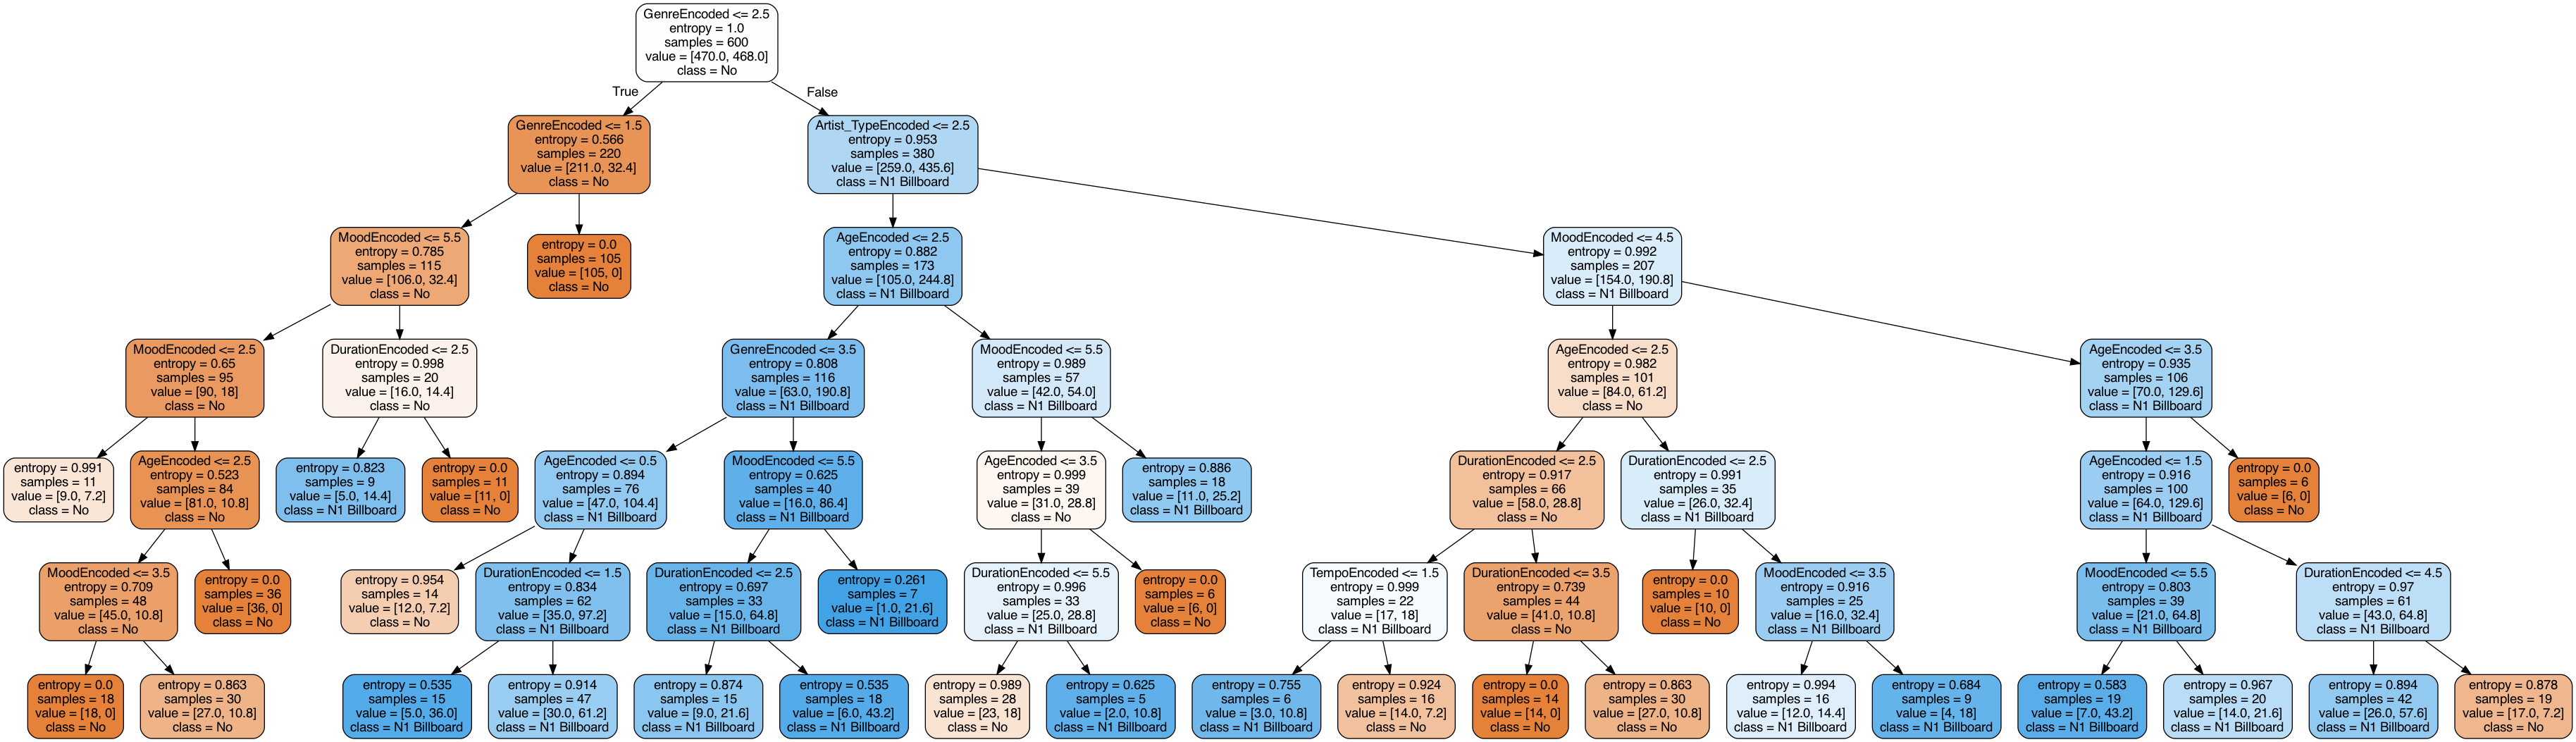

In [21]:
#Importación de librerías
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

#Creación de los arreglos de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = datos_encoded['Top']
x_train = datos_encoded.drop(['Top'], axis = 1).values 

#Creación del Árbol de Decisión con profundidad igual a 5
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split = 20,
                                            min_samples_leaf = 5,
                                            max_depth = 6,
                                            class_weight = {1:3.6})
decision_tree.fit(x_train, y_train)

#Exportación del modelo a archivo ".dot"
with open("./Datos/Arbol.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file = f,
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(datos_encoded.drop(['Top'], axis = 1)),
                              class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled = True )
        
#Exportación del modelo a archivo ".png"
check_call(['dot','-Tpng','./Datos/Arbol.dot','-o','./Datos/Arbol.png'])
PImage("./Datos/Arbol.png")

### Precisión del Árbol de Decisión
En el gráfico se puede observar un nodo raíz que hace una primer subdivisión por género y las salidas van a izquierda por `True` que sea menor o igual a 2.5, es decir los géneros 0, 1 y 2 (eran los que menos `Top=1` tenían) y a derecha en `False` van los géneros 3 y 4 que eran *Pop* y *Urban* con gran cantidad de usuarios top en el Billboard.

En el segundo nivel vemos que la cantidad de muestras (*samples*) queda repartida en 220 y 380, respectivamente.

A medida que se baja de nivel se puede ver que los valores de entropía se aproximan más a 1 cuando el nodo tiene más muestras `Top=1` (en color azul) y se acercan a 0 cuando hay mayoría de muestras `Top=0` (en color naranja).

En los diversos niveles se pueden ver divisiones por tipo de artista, edad, duración y mood. También se observan algunas hojas naranjas que finalizan antes de llegar al último nivel, esto es porque alcanzan un nivel de entropía cero.

La precisión alcanzada por el **Árbol de Decisión** es:

In [22]:
#Precisión del Árbol de Decisión
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

#Impresión de los Resultados
print("La precisión obtenida por el Árbol de Decisión es: %.2f"% acc_decision_tree +"%")

La precisión obtenida por el Árbol de Decisión es: 74.33%


#### Predicciones empleando el Árbol de Decisión
Se probará el **Árbol de Decisión** recién creado con 2 artistas que entraron al **Billboard** en 2017: 

1. ***Camila Cabello*** llegó al numero 1 con la Canción "*Havana*". 
2. ***Imagine Dragons*** con la Canción "*Believer*" que alcanzó un puesto 42 pero no llegó al número 1.

Para ello se empleará el método `.predict()` de la siguiente manera:

Para el primer escenario (***Camila Cabello***, canción "*Havana*"), los datos son:
* `Top`: 1 (en el Billboard).
* `MoodEncoded`: 5 (Cool, Excited, Upbeat, Stirring, Lively).
* `TempoEncoded`: 2 (Medium).
* `GenreEncoded`: 4 (Urban).
* `Artist_TypeEncoded`: 2 (Female).
* `AgeEncoded`: 0 (menor a 21 años).
* `DurationEncoded`: 3 (entre 210 y 240 segundos).

In [23]:
#Predicción para el primer escenario
x_test = pd.DataFrame(columns=('Top','MoodEncoded', 'TempoEncoded', 'GenreEncoded','Artist_TypeEncoded','AgeEncoded','DurationEncoded'))
x_test.loc[0] = (1,5,2,4,2,0,3)
y_pred = decision_tree.predict(x_test.drop(['Top'], axis = 1))
y_proba = decision_tree.predict_proba(x_test.drop(['Top'], axis = 1))

#Impresión de los Resultados
print("Camila Cabello, canción titulada \"Havana\"")
print("Prediccion: " + str(y_pred))
print("Probabilidad de Acierto: " + str(round(y_proba[0][y_pred][0]* 100, 2))+"%")

Camila Cabello, canción titulada "Havana"
Prediccion: [1]
Probabilidad de Acierto: 87.8%


Esto implica que "*Havana*" llegará al top 1 [Predicción igual a 1] con una probabilidad especificada.

Para el segundo escenario (***Imagine Dragons***, canción "*Believer*"), los datos son:
* `Top`: 0 (fuera del Billboard).
* `MoodEncoded`: 4 (Yearning, Sophisticated, Aggresive, Fiery, Sentimental, Melancholy, Brooding).
* `TempoEncoded`: 2 (Medium).
* `GenreEncoded`: 1 (Alternative & Punk, Electronica, Rock).
* `Artist_TypeEncoded`: 3 (Male).
* `AgeEncoded`: 2 (entre 26 y 30 años).
* `DurationEncoded`: 3 (entre 210 y 240 segundos).

In [24]:
#Predicción para el segundo escenario
x_test = pd.DataFrame(columns=('Top','MoodEncoded', 'TempoEncoded', 'GenreEncoded','Artist_TypeEncoded','AgeEncoded','DurationEncoded'))
x_test.loc[0] = (0,4,2,1,3,2,3)
y_pred = decision_tree.predict(x_test.drop(['Top'], axis = 1))
y_proba = decision_tree.predict_proba(x_test.drop(['Top'], axis = 1))

#Impresión de los Resultados
print("Imagine Dragons, canción titulada \"Believer\"")
print("Prediccion: " + str(y_pred))
print("Probabilidad de Acierto: " + str(round(y_proba[0][y_pred][0]* 100, 2))+"%")

Imagine Dragons, canción titulada "Believer"
Prediccion: [0]
Probabilidad de Acierto: 71.43%


Esto implica que "*Believer*" no llegará al top 1 [Predicción igual a 0] con una probabilidad especificada.

A continuación se muestran los caminos tomados:
* "*Havana*" en color morado, que alcanzó el número 1.
* "*Believer*" en color amarillo, que no alcanzó el número 1.
<br>
<img src="./Imagenes/Arbol_Ruta.png" style="width:1000px;height:285px;" class="center">
<br>

<div class="alert alert-block alert-danger">
<b>.: Fin del Tema :.</b>
</div>